In [1]:
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100% !important; } </style>'))

# Gradient Ascent

The function findMaximum computes the maximum of the function <tt>f</tt> using the method of <font color="blue">gradient ascent</font>.  It is assumed that the function <tt>f</tt> is <font color="blue">convex</font> and  therefore there is only one global maximum.  The function takes the following arguments:
<ul>
    <li> <tt>f</tt>:  The function to minimize.  This function is expected to take one argument as its input.  This input is assumed to be a scalar or a  numpy vector and <tt>f</tt> returns a floating point number.</li>
<li> <tt>fGrad</tt>: The gradient of <tt>f</tt>.  This function takes one input that is is assumed to be a scalar or a numpy vector.</li>
<li> <tt>start</tt>: The value used to start the iteration.</li>
<li> <tt>eps</tt>: Precisison.  If the values of <tt>f</tt> change less than <tt>eps</tt>, then the algorithm stops.</li>
</ul>    
The function returns both the position $x_{max}$ of the maximum as well as the value that the function <tt>f</tt> has at this position.  Furthermore, the number of iterations is returned.

The algorithms computes a sequence $(x_n)_n$ that is defined inductively:
<ol>
    <li>$x_0 := \texttt{start}$,</li>
    <li>$x_{n+1} := x_n + \alpha \cdot \nabla f(x_n)$.</li>
</ol>
The algorithm given below adjusts the <font clor="blue">learning rate</font> $\alpha$ dynamically: If the $f(x_{n+1}) > f(x_n)$, then the learning rate alpha is increased by a factor of $1.2$.  Otherwise, the learning rate is decreased by a factor of $\frac{1}{2}$. 

In [2]:
def findMaximum(f, gradF, start, eps):
    x     = start
    fx    = f(x)
    alpha = 1.0
    cnt   = 1  # number of iterations
    while True:
        xOld, fOld = x, fx
        x  += alpha * gradF(x)
        fx  = f(x)
        print(f'cnt = {cnt}, f({x}) = {fx}')
        print(f'gradient = {gradF(x)}')
        if fx <= fOld:   
            alpha *= 0.5
            print(f'decrementing: alpha = {alpha}')
            x, fx = xOld, fOld
            continue
        else:
            alpha *= 1.2
            print(f'incrementing: alpha = {alpha}')
        if abs(fx - fOld) <= abs(fx) * eps:
            return x, fx, cnt
        cnt += 1

In [3]:
import numpy as np

We will try to find the maximum of the function
$$ f(x) := \sin(x) - x^2/2 $$

In [4]:
def f(x):
    return np.sin(x) - x**2 / 2

Let us plot this function.

In [5]:
import matplotlib.pyplot as plt
import seaborn           as sns

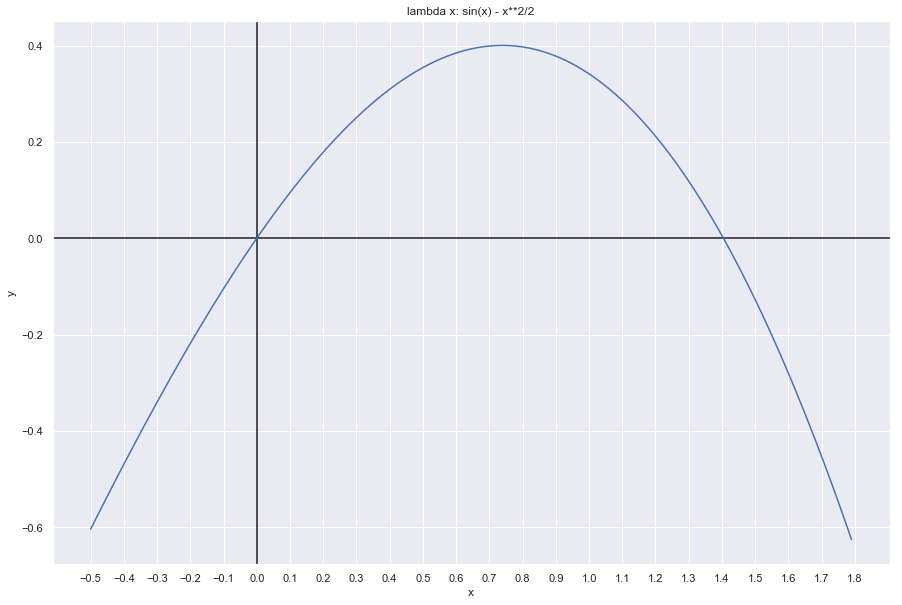

In [6]:
X = np.arange(-0.5, 1.8, 0.01)
Y = f(X)
plt.figure(figsize=(15, 10))
sns.set(style='darkgrid')
plt.title('lambda x: sin(x) - x**2/2')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-0.5, 1.81, step=0.1))
sns.lineplot(X, Y, color='b')
plt.savefig('sin-minus-square.pdf')

Clearly, this function has a maximum somewhere between 0.7 and 0.8.  Let us use gradient ascent to find it.  In order to do so, we have to provide the derivative of this function.  We have
$$ \frac{\mathrm{d}f}{\mathrm{d}x} = \cos(x) - x. $$

In [ ]:
def fs(x):
    return np.cos(x) - x

Let us plot the derivative together with the function.

In [ ]:
X2 = np.arange(0.4, 1.1, 0.01)
Ys = fs(X2)
plt.figure(figsize=(15, 10))
sns.set(style='darkgrid')
plt.title('lambda x: sin(x) - x**2/2 and its derivative')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-0.5, 1.81, step=0.1))
plt.yticks(np.arange(-0.6, 0.61, step=0.1))
sns.lineplot(X, Y, color='b')
sns.lineplot(X2, Ys, color='r')

The function $\texttt{findMaximum}(f, \texttt{gradF}, \texttt{start}, \texttt{eps}, \texttt{verbose}=\texttt{False})$ 
computes the maximum of the function $f$ using <em style="color:blue;">gradient ascent</em>.  The parameters are as follows:
<ol>
<li> $\texttt{f}$ is the function that is to be maximized.  It is assumed that $\texttt{f}$ takes a vector
     $\texttt{x}\in \mathbb{R}^n$ as its input and that it returns a real number.  </li>
<li> $\texttt{gradF}$ is the gradient of \texttt{f}.  It takes a vector
     $\texttt{x}\in \mathbb{R}^n$ as its input and returns the vector $\nabla \mathtt{f}(\mathtt{x})$.</li>
<li> $\texttt{start}$ is a vector from $\mathbb{R}^n$ that is used as the value of $\mathbf{x}_0$.  In
     practice, we will often use $\mathbf{0} \in \mathbb{R}^n$ as the start vector.</li>
<li> $\texttt{eps}$ is the precision that we need for the maximum. If the difference $x_{n+1} - x_n$ is less than $\texttt{eps}$, 
     then the iteration stops. </li>
<li> $\texttt{verbose}$ controls whether intermediate values are printed to the screen.  This might by helpful
     in order to assess the convergence of the procedure.</li>
</ol>
The function returns both the position $x_{\max}$ of the maximum as well as the
value $f(x_{\max})$.  Furthermore, the number of iterations is returned.
The main idea to find $x_{\max}$ is to define a sequence $(x_n)_{n\in\mathbb{N}}$ inductively:
<ol>
<li> $x_0 := \texttt{start}$</li>
<li> $x_{n+1} := x_n + \alpha \cdot \nabla f(x_n)$</li>
</ol>
Here $\alpha$ is called the <em style="color:blue;">learning rate</em>.  The value of $\alpha$ is adapted dynamically.

In [ ]:
def findMaximum(f, gradF, start, eps, verbose):
    x     = start
    fx    = f(x)
    alpha = 0.1
    cnt   = 0  # number of iterations
    while True:
        cnt += 1
        xOld, fOld = x, fx
        x  += alpha * gradF(x)
        fx  = f(x)
        if verbose:
            print(f'cnt = {cnt}, x = {x}, f({x}) = {fx}')
            print(f'gradient = {gradF(x)}')
        if abs(x - xOld) <= abs(x) * eps and cnt > 1:
            return x, fx, cnt
        if fx <= fOld:   
            alpha *= 0.5
            if verbose:
                print(f'decrementing: alpha = {alpha}')
            x, fx = xOld, fOld
            continue
        else:
            alpha *= 1.2
            if verbose:
                print(f'incrementing: alpha = {alpha}')

In [ ]:
x_max, _, _ = findMaximum(f, fs, 0.8, 1e-15, True)

In [ ]:
x_max

The maximum seems to be at $x \approx 0.739085$.  Let's check the derivative at this position.

In [ ]:
fs(x_max)